In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,matthews_corrcoef,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
data=load_breast_cancer()

In [123]:
X=data.data

In [124]:
Y=data.target

In [125]:
pd.value_counts(Y)

1    357
0    212
dtype: int64

In [126]:
load_breast_cancer().target.dtype

dtype('int32')

In [127]:
x_train,x_test,y_train,y_test=train_test_split(scale(data.data),data.target,test_size=0.2)

In [128]:
x_train.shape

(455, 30)

In [129]:
y_train.shape

(455,)

In [133]:
model=SVC(C=1,probability=True,gamma=0.0001)

In [134]:
model.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
y_pred=model.predict(x_test)

In [136]:
acc=accuracy_score(y_pred=y_pred,y_true=y_test)
acc

0.7105263157894737

In [137]:
mcc=matthews_corrcoef(y_pred=y_pred,y_true=y_test)
mcc

0.4736347716407829

In [138]:
MCC= make_scorer(matthews_corrcoef)

In [139]:
clf=cross_val_score(estimator=model,X=X,y=Y,scoring=MCC,cv=5)

In [140]:
np.mean(clf)

0.861599073993635

In [151]:
c=np.array([1,2,3,4,5,6,7,8,9,10,11])

# Tunning C as a parameter

In [153]:
score=[]
for i in range(0,len(c)):
    model=SVC(C=c[i],probability=True,gamma=0.0001)
    k = np.mean(cross_val_score(estimator=model,X=X,y=Y,scoring=MCC,cv=5))
    score.append(k)
print("Score=",score)

Score= [0.861599073993635, 0.8619520377947538, 0.8736352371619324, 0.8659060505013414, 0.8580474232969572, 0.8616202233182729, 0.8655931532579739, 0.8653754200625094, 0.8694704633236281, 0.8551041804709696, 0.8592257416690442]


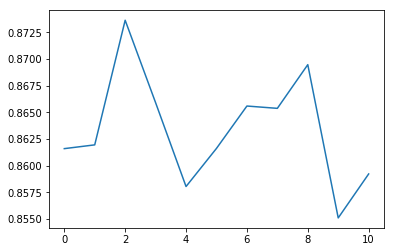

In [154]:
plt.plot(range(0,len(c)),score)

In [155]:
model=SVC(C=2,probability=True,gamma=0.0001)

In [156]:
model.fit(x_train,y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
y_prediction=model.predict_proba(x_test)

In [158]:
y_prediction[:,1]

array([9.74103509e-01, 9.89766581e-05, 9.99999640e-01, 9.94102649e-01,
       1.89465491e-04, 9.99999146e-01, 9.99999770e-01, 9.89158192e-01,
       6.84784265e-01, 9.95191788e-01, 3.62921064e-02, 2.83531403e-02,
       9.10259434e-01, 7.28999402e-01, 9.99999673e-01, 9.90675205e-01,
       9.99994106e-01, 9.77952367e-01, 7.46182247e-01, 2.46460159e-05,
       1.10455584e-06, 9.89611620e-01, 2.97055509e-01, 9.90096716e-01,
       4.54893351e-07, 9.91014815e-01, 4.84517642e-04, 8.55175754e-01,
       3.58793241e-02, 9.78404960e-01, 3.78878929e-02, 2.83869877e-03,
       9.83542493e-01, 8.54771863e-05, 1.36557450e-03, 1.58807257e-03,
       5.72140714e-04, 9.46274914e-01, 5.16004776e-03, 9.99998867e-01,
       9.97284949e-01, 1.81960204e-07, 1.09232110e-02, 9.83299702e-01,
       3.37573100e-01, 8.57182499e-01, 5.14711752e-01, 2.64070318e-03,
       7.86151458e-05, 9.71949534e-01, 9.86382456e-01, 4.88577063e-03,
       9.99989578e-01, 5.47985847e-02, 9.83166178e-01, 9.99998607e-01,
      

# ROC Curve

In [159]:
auc = roc_auc_score(y_test, y_prediction[:,1])

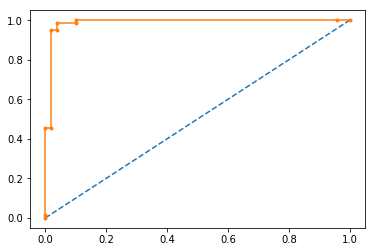

In [160]:
fpr, tpr, thresholds = roc_curve(y_test, y_prediction[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')